In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings


In [2]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('salaries.csv')

In [3]:
# Check the first few rows of the dataset
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [5]:
data.shape

(16534, 11)

In [6]:
# Checkdatatypes of columns
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
# Check for any missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Check for duplicated rows in the DataFrame
duplicated_rows = data[data.duplicated()]

# Get the number of duplicated rows
num_duplicated_rows = duplicated_rows.shape[0]

# Print the number of duplicated rows
print("Number of duplicated rows:", num_duplicated_rows)


Number of duplicated rows: 6421


In [9]:
# Drop duplicated rows from the DataFrame
data.drop_duplicates(inplace=True)

# Confirm the removal of duplicated rows by printing the number of rows after removal
data.shape

(10113, 11)

In [10]:
# Get the count of each unique value in the 'work_year' column
year_counts =  data['work_year'].value_counts()

# Print the count of each unique value
print(year_counts)

work_year
2023    4632
2024    4074
2022    1116
2021     216
2020      75
Name: count, dtype: int64


In [11]:
# Read thedatawhere work_year more than 2020
data = data[ data['work_year'] > 2020]

In [12]:
# Drop the 'salary_currency' and 'salary' columns
data.drop(['salary_currency', 'salary'], axis=1,inplace=True)

In [13]:
# Replacing values in the "remote_ratio" column:
# - 0 is replaced with "on site"
# - 50 is replaced with "hybrid"
# - 100 is replaced with "remote"
data['remote_ratio'] = data['remote_ratio'].replace({0: 'on site', 50: 'hybrid', 100: 'remote'})

#### Note:
"Machine Learning Engineer" has been replaced with "ML Engineer" because they refer to the same job title, but with different names.


In [14]:
data['job_title'] = data['job_title'].replace({'Machine Learning Engineer':'ML Engineer'})

All instances of "IL" in both "company_location" and "employee_residence" have been replaced with "PS".

In [15]:
data['company_location'] = data['company_location'].replace({'IL':'PS'})
data['employee_residence'] = data['employee_residence'].replace({'IL':'PS'})


In [71]:
# عدد الموظفين المطلوب لكل دولة
employee_count_by_country = data[data['company_location'] == 'QA']
employee_count_by_country

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
10142,2023,MI,FT,AI Engineer,300000,QA,remote,QA,M


# Data Visualization 

**1. How has the average salary changed over the years?**

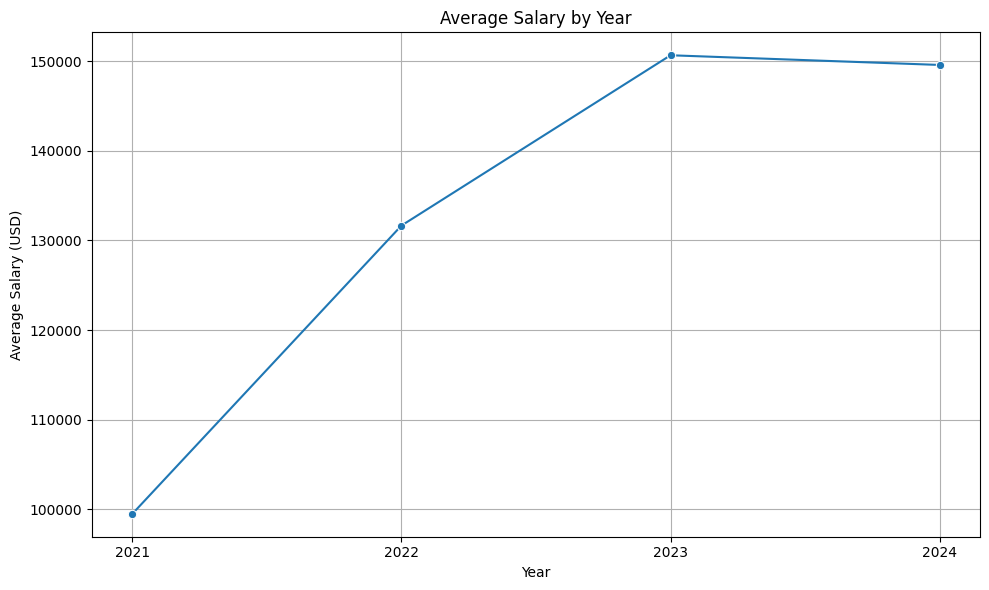

In [37]:
# Ignoring warnings
warnings.filterwarnings("ignore")

# Getting unique years from the "work_year" column
unique_years = sorted(data['work_year'].unique())

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='work_year', y='salary_in_usd', estimator='mean', errorbar=None,  marker='o', markers=True)
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(unique_years)
plt.tight_layout()
plt.grid(True)
plt.show()

**2. What is the average salary for each experience level, and how do they rank?**

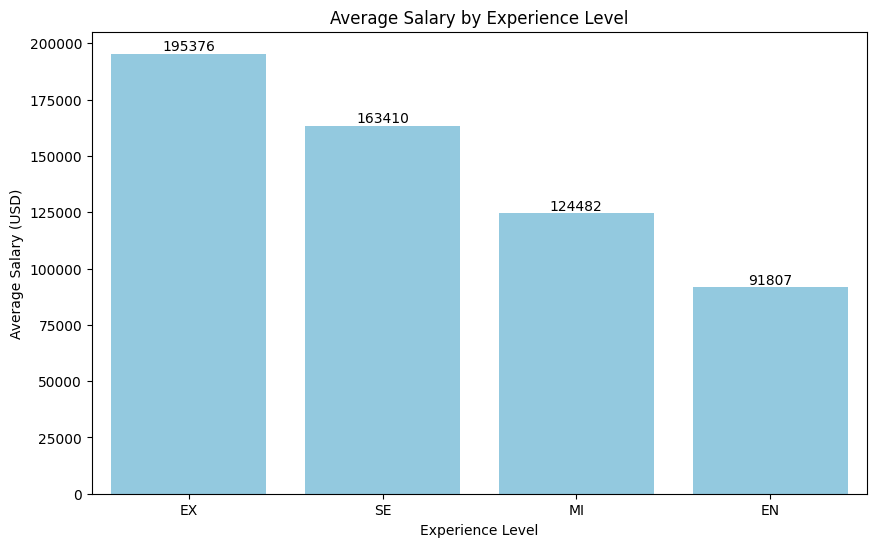

In [17]:
# حساب متوسط الراتب لكل مستوى خبرة وفرز المستويات في ترتيب تنازلي
experience_salary_order = data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).index

# رسم المخطط مع فرز المستويات
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=data, x='experience_level', y='salary_in_usd', 
                estimator='mean', order=experience_salary_order, errorbar=None, color='skyblue')
plt.title('Average Salary by Experience Level')  # Title of the plot
plt.xlabel('Experience Level')  # X-axis label
plt.ylabel('Average Salary (USD)')  # Y-axis label

# Add labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            int(bar.get_height()), ha='center', va='bottom', fontsize=10)
plt.grid(False)
plt.show()


**3. How does the average salary vary across different employment types?**


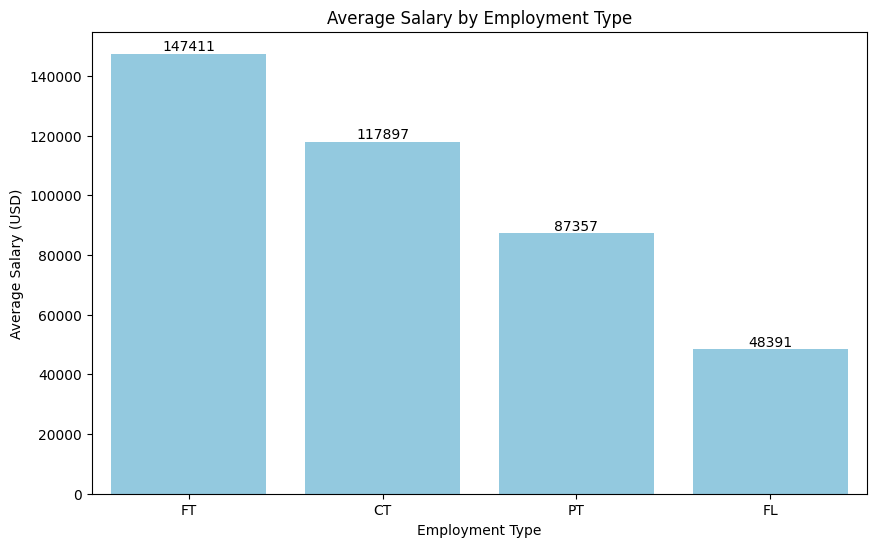

In [18]:
# Visualize the average salary for each employment type
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=data, x='employment_type', y='salary_in_usd', estimator='mean', errorbar=None, color='skyblue')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')

# Add labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            int(bar.get_height()), ha='center', va='bottom', fontsize=10)
plt.grid(False)
plt.show()

**4. How does the average salary vary across different company sizes?**

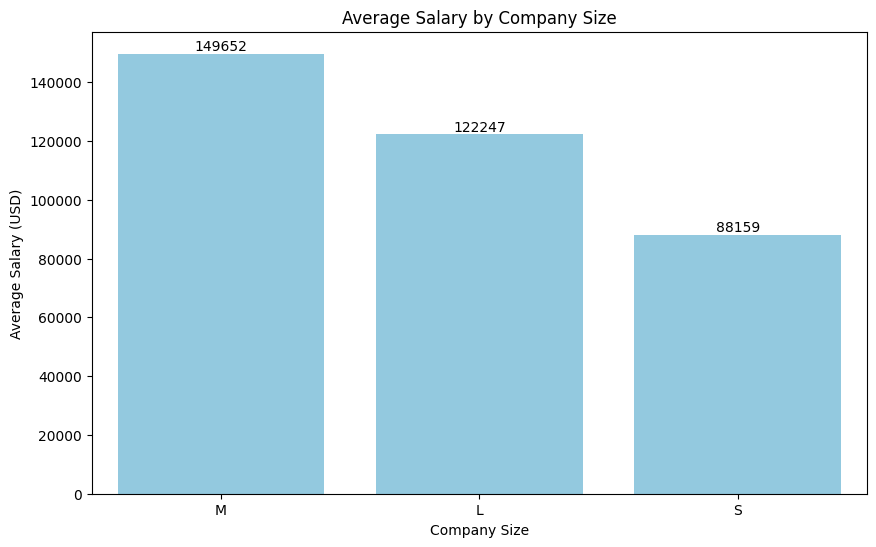

In [19]:
# Visualize the average salary for each company size
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=data, x='company_size', y='salary_in_usd', estimator='mean', errorbar=None, color='skyblue')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')

# Add labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            int(bar.get_height()), ha='center', va='bottom', fontsize=10)
    
plt.grid(False)
plt.show()

**5. How does the average salary change over the years for companies of different sizes?**

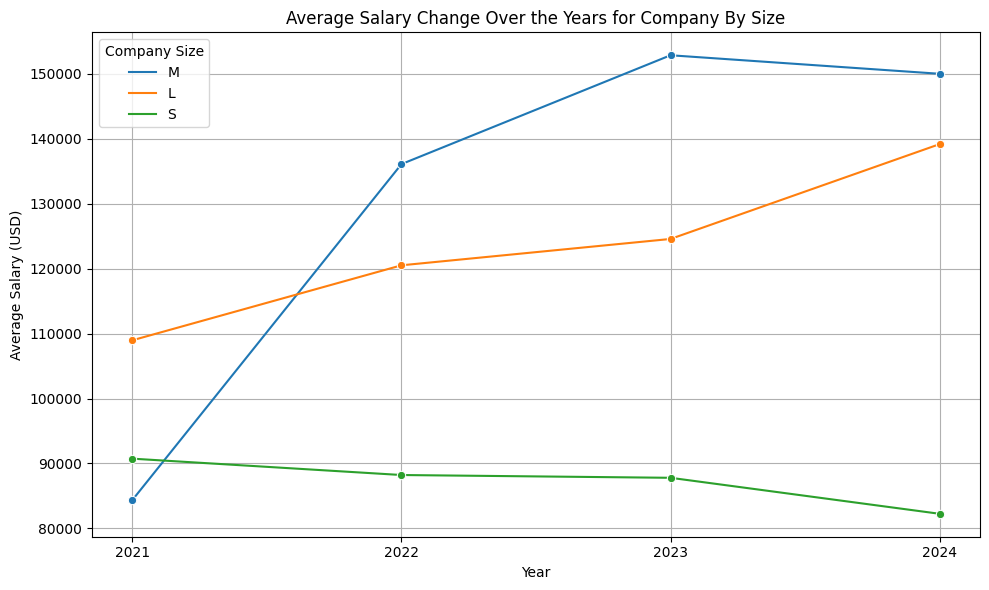

In [38]:
warnings.filterwarnings("ignore")

# Getting unique years from the "work_year" column
unique_years = sorted(data['work_year'].unique())

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', estimator='mean', errorbar=None,  marker='o', markers=True)
plt.title('Average Salary Change Over the Years for Company By Size')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(unique_years)
plt.legend(title='Company Size')
plt.tight_layout()
plt.grid(True)
plt.show()

**6. How does the average salary change over the years for companies based on their remote work ratio?**

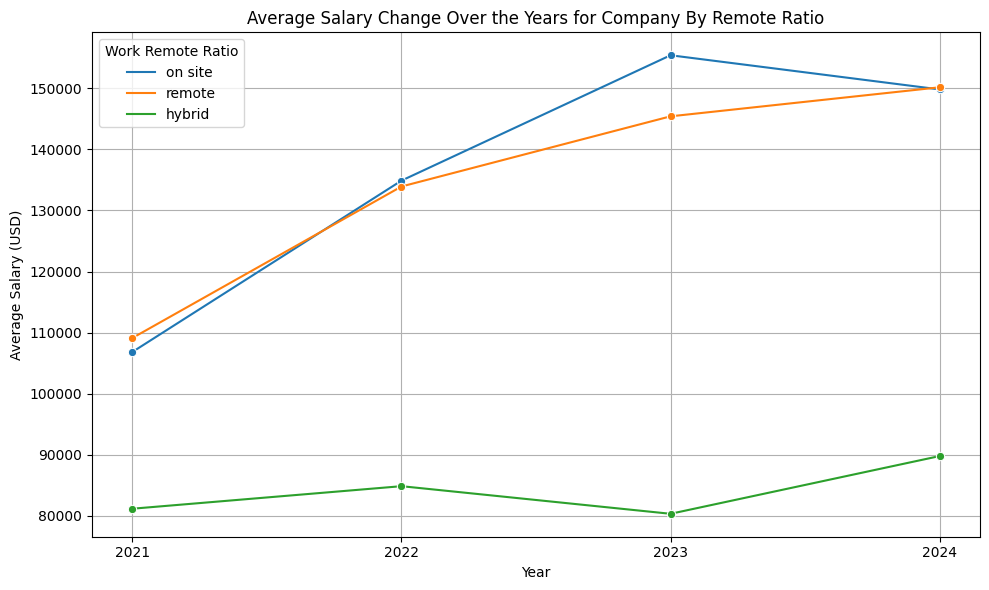

In [39]:
# Ignoring warnings
warnings.filterwarnings("ignore")

# Getting unique years from the "work_year" column
unique_years = sorted(data['work_year'].unique())

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='remote_ratio', 
            estimator='mean', errorbar=None, marker='o', markers=True)
plt.title('Average Salary Change Over the Years for Company By Remote Ratio')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(unique_years)
plt.legend(title='Work Remote Ratio')
plt.tight_layout()
plt.grid(True)
plt.show()


**7. Which are the top 5 countries with the most employees?**

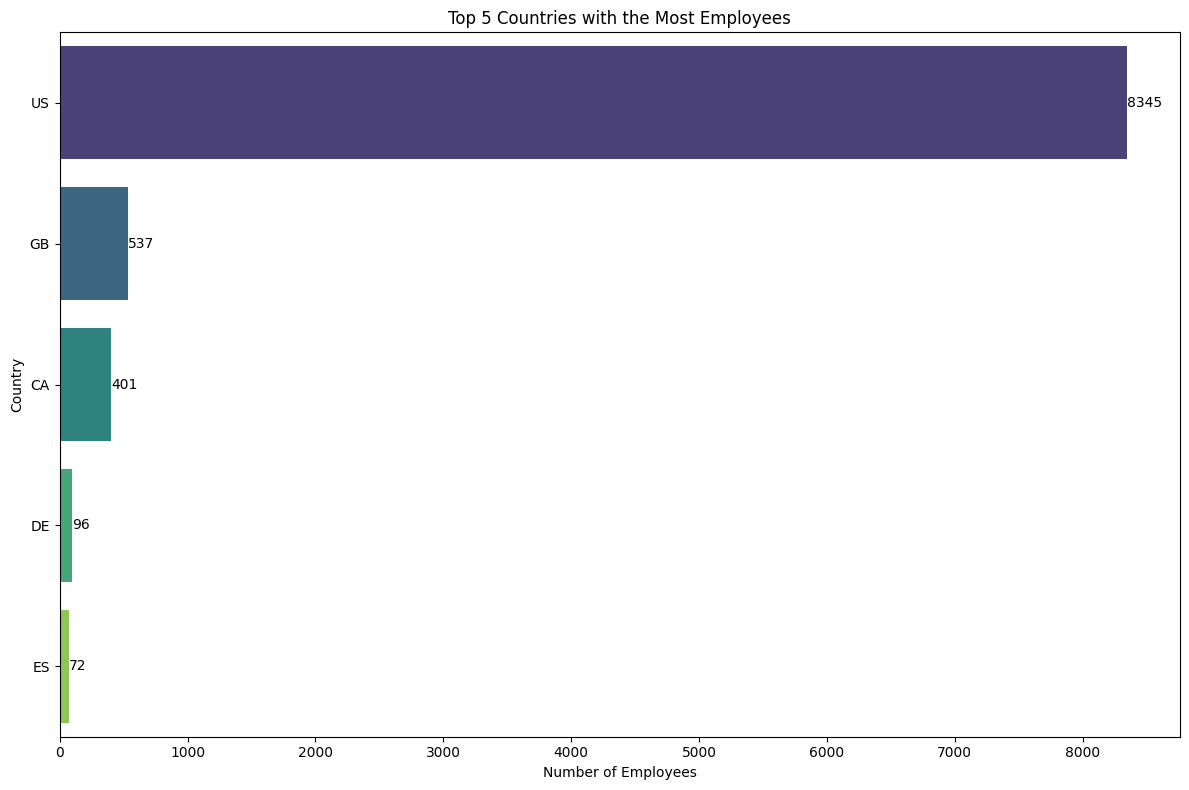

In [70]:
# Count the number of employees in each country
employee_count_by_country = data['company_location'].value_counts().head(5).reset_index()
employee_count_by_country.columns = ['Country', 'Employee Count']

# Plot the top 5 countries with the most employees
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=employee_count_by_country, x='Employee Count', y='Country', palette='viridis')
plt.title('Top 5 Countries with the Most Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Country')
plt.tight_layout()

# Add labels on bars
for index, value in enumerate(employee_count_by_country['Employee Count']):
    ax.text(value, index, f'{value}', color='black', ha="left", va="center")

plt.show()


**8. How does the average salary vary across the top 10 employee residences based on employee count?**

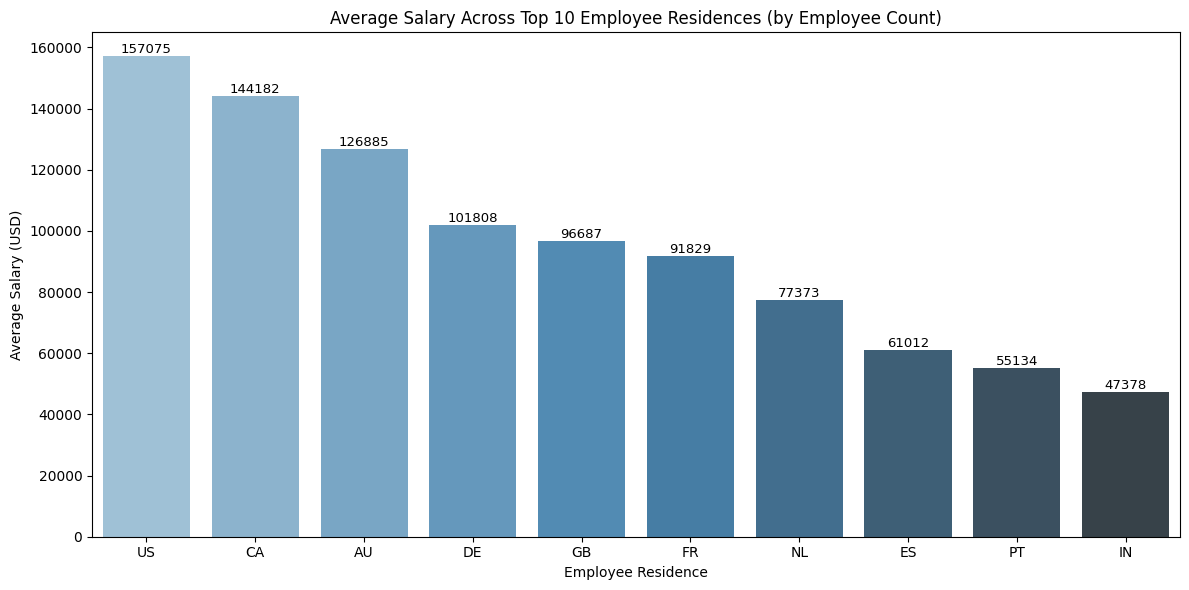

In [69]:
# Group the data by employee residence and calculate the number of employees in each country
employee_count_by_residence = data['employee_residence'].value_counts().head(10)

# Sort the countries by employee count
sorted_employee_count_by_residence = employee_count_by_residence.sort_values(ascending=False)

# Filter the data for the top 10 countries by employee count
filtered_data_top_10_countries = data[data['employee_residence'].isin(sorted_employee_count_by_residence.index)]

# Group the filtered data by employee residence and calculate the average salary for each group
average_salary_by_residence_top_10 = filtered_data_top_10_countries.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

# Sort the average salary by employee residence
sorted_average_salary_by_residence_top_10 = average_salary_by_residence_top_10.sort_values(by='salary_in_usd', ascending=False)

# Visualize the average salary for the top 10 employee residences by employee count
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='employee_residence', y='salary_in_usd', data=sorted_average_salary_by_residence_top_10, palette='Blues_d')
plt.title('Average Salary Across Top 10 Employee Residences (by Employee Count)')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary (USD)')

# Add labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=9.5)
plt.tight_layout()
plt.show()


**Note:**
Qatar has only one employee.


**9. How do the average salaries compare across the top 10 company locations by employee count?**

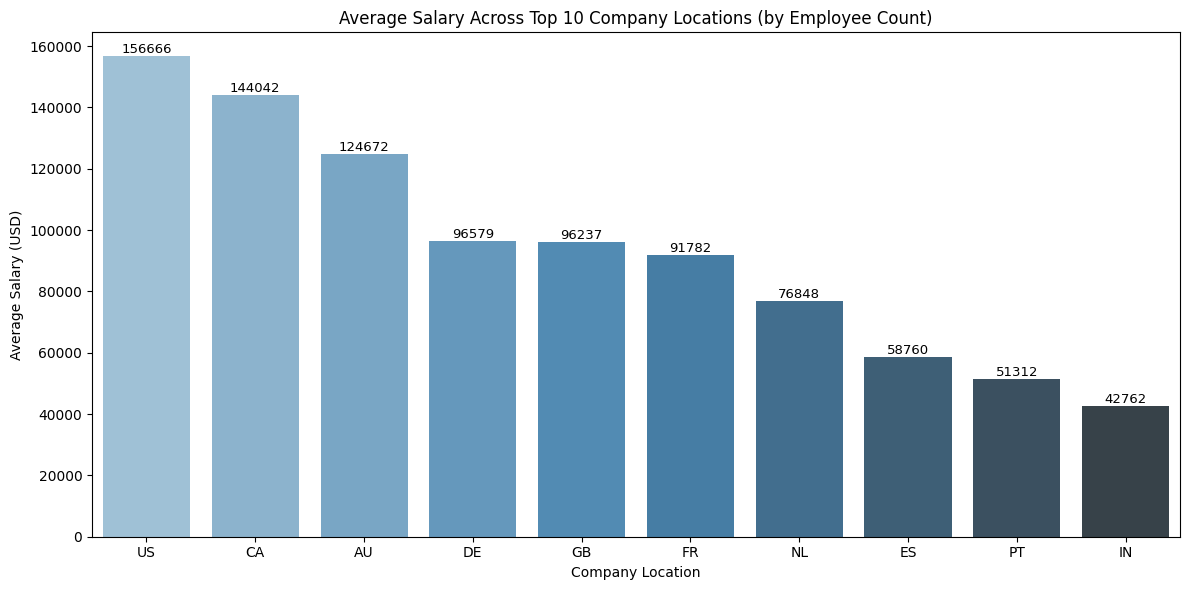

In [68]:
# Group the data by company location and calculate the number of employees in each country
employee_count_by_country = data['company_location'].value_counts().head(10)

# Sort the countries by employee count
sorted_employee_count_by_country = employee_count_by_country.sort_values(ascending=False)

# Filter the data for the top 10 countries by employee count
filtered_data_top_10_countries = data[data['company_location'].isin(sorted_employee_count_by_country.index)]

# Group the filtered data by company location and calculate the average salary for each group
average_salary_by_company_location_top_10 = filtered_data_top_10_countries.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the average salary by company location
sorted_average_salary_by_company_location_top_10 = average_salary_by_company_location_top_10.sort_values(by='salary_in_usd', ascending=False)

# Visualize the average salary for the top 10 company locations by employee count
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='company_location', y='salary_in_usd', data=sorted_average_salary_by_company_location_top_10, palette='Blues_d')
plt.title('Average Salary Across Top 10 Company Locations (by Employee Count)')
plt.xlabel('Company Location')
plt.ylabel('Average Salary (USD)')

# Add labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=9.5)
plt.tight_layout()
plt.show()


**10. What is the distribution of remote work ratios within each company size category?**

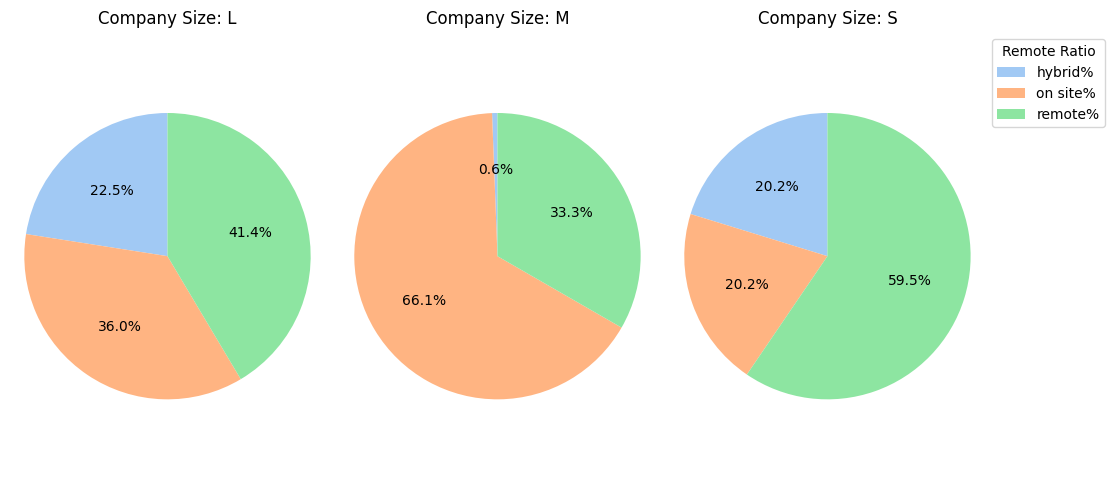

In [24]:
# Calculate the percentage of each remote_ratio within each company size category
remote_ratio_percentage = data.groupby(['company_size', 'remote_ratio']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Define the layout of the grid
num_cols = remote_ratio_percentage.shape[0]
num_rows = 1  # One row for pie charts

# Plotting a grid of pie charts with colors only (no labels) horizontally
plt.figure(figsize=(15, 5))  # Adjusted size for better layout

# Define colors
colors = sns.color_palette("pastel")

for i, (company_size, data_for_plt) in enumerate(remote_ratio_percentage.iterrows(), start=1):    
    # Plot pie chart
    plt.subplot(num_rows, num_cols, i)
    plt.pie(data_for_plt, labels=None, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.title(f'Company Size: {company_size}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a legend outside the plots
legend_labels = [f'{remote_ratio}%' for remote_ratio in remote_ratio_percentage.columns]
plt.legend(labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="Remote Ratio")

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the right space to fit the legend

plt.show()


**11. Which are the top 5 countries with the most employees in large companies?**

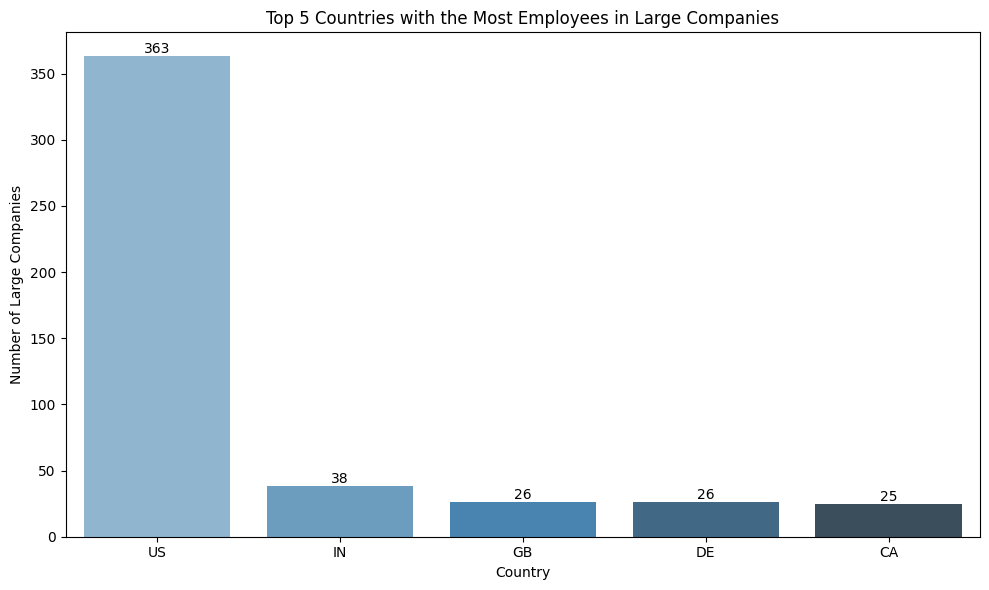

In [26]:
# Group the data by company location and company size, and count the number of large companies in each country
large_company_count_by_country = data[data['company_size'] == 'L']['company_location'].value_counts().head(5)

# Plot the top 5 countries with the most large companies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=large_company_count_by_country.index, y=large_company_count_by_country.values, palette='Blues_d')

# Adding labels on top of each bar
for index, value in enumerate(large_company_count_by_country.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Adding title and labels
plt.title('Top 5 Countries with the Most Employees in Large Companies')
plt.xlabel('Country')
plt.ylabel('Number of Large Companies')

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot
plt.show()


**12. Which are the top 5 countries with the most experienced employees?**

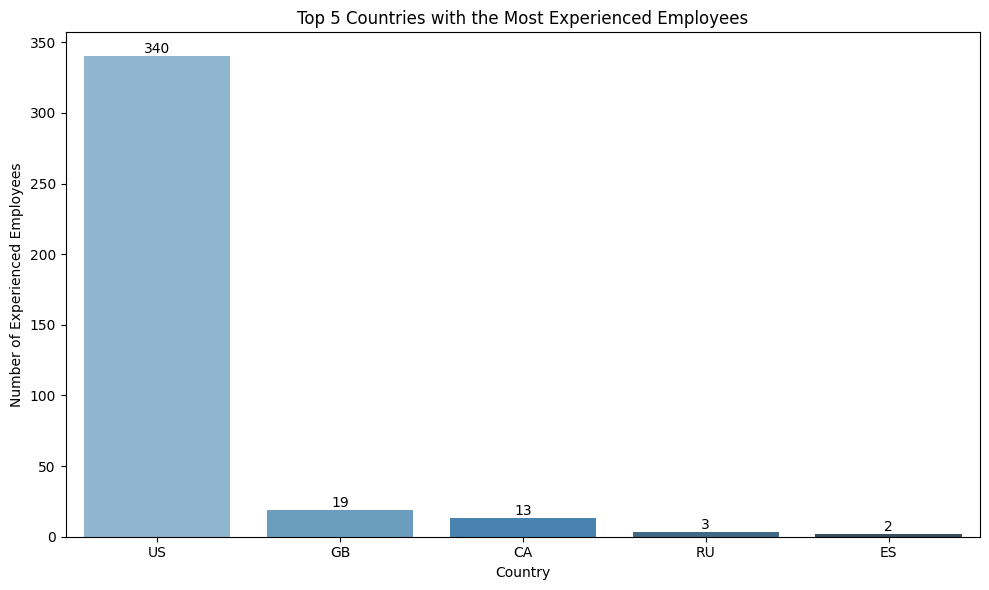

In [27]:
# Group the data by country and experience, then count the number of employees with experience in each country
experience_count_by_country = data[data['experience_level'] == 'EX']['company_location'].value_counts().head(5)

# Plot the relationship between countries and experienced employees using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_count_by_country.index, y=experience_count_by_country.values, palette='Blues_d')

# Adding labels on top of each bar
for index, value in enumerate(experience_count_by_country.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Adding title and labels
plt.title('Top 5 Countries with the Most Experienced Employees')
plt.xlabel('Country')
plt.ylabel('Number of Experienced Employees')

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot
plt.show()


**13. What are the top 10 salaries in the dataset?**

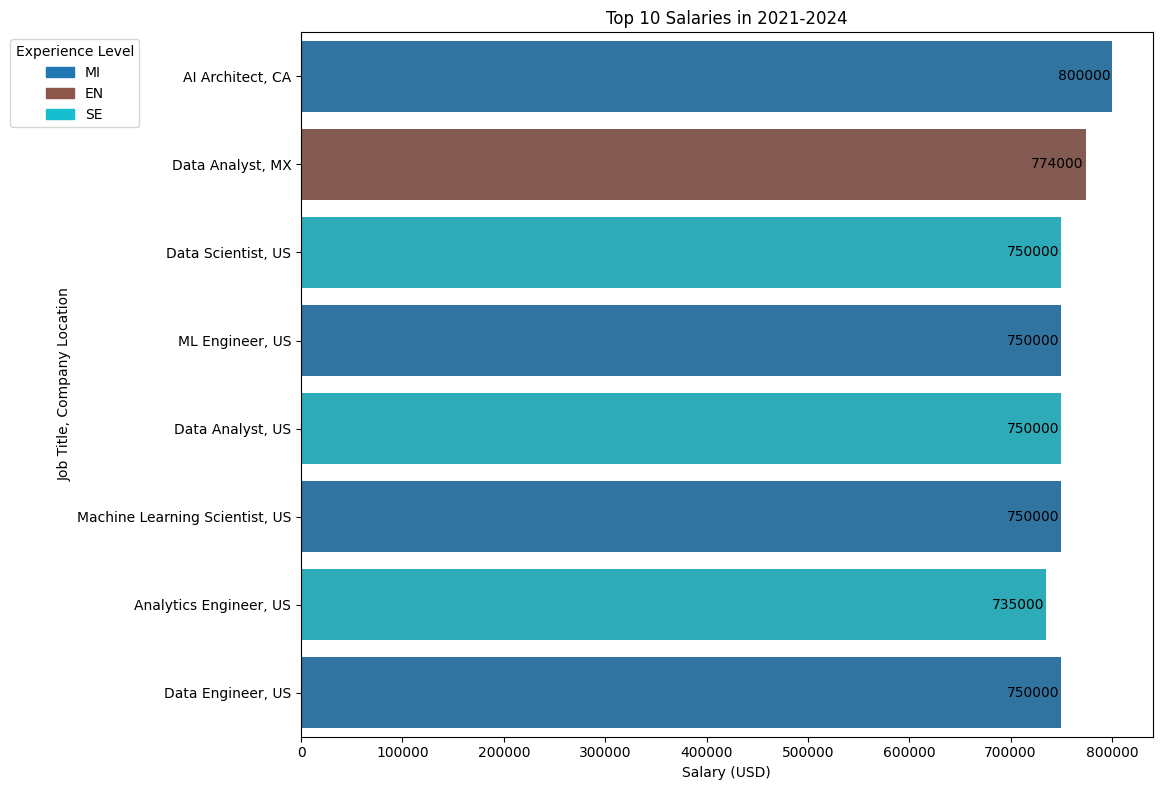

In [40]:
# Ignoring warnings
warnings.filterwarnings("ignore")

# Sorting the data by salaries in descending order
top_salaries = data.sort_values(by='salary_in_usd', ascending=False)

# Taking the top 10 employees directly from the sorted data
top_10_salaries = top_salaries[:10]

# Extracting job titles and company locations
job_location_labels = [f'{job}, {location}' for job, location in zip(top_10_salaries['job_title'], top_10_salaries['company_location'])]

# Get unique experience levels and assign a color to each
unique_experience_levels = pd.Series(top_10_salaries['experience_level']).unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_experience_levels)))

# Create a dictionary to map each experience level to its color
experience_level_color_map = {experience_level: color for experience_level, color in zip(unique_experience_levels, colors)}

unique_work_years = sorted(data['work_year'].unique())

# Creating the plot
plt.figure(figsize=(12, 8))

# Plotting the salaries without specifying any particular order
bars = sns.barplot(x=top_10_salaries['salary_in_usd'], y=job_location_labels, palette=top_10_salaries['experience_level'].map(experience_level_color_map), orient='h', errorbar=None)

# Adding labels with salary values on the right of each bar
for bar in bars.patches:
    xval = bar.get_width()
    bars.annotate(format(xval, '.0f'), 
                (xval, bar.get_y() + bar.get_height() / 2), 
                ha='right', va='center', 
                size=10, xytext=(-1.25, 0), 
                textcoords='offset points')

# Adding legend
legend_patches = [mpatches.Patch(color=color, label=experience_level) for experience_level, color in experience_level_color_map.items()]
plt.legend(handles=legend_patches, title='Experience Level', loc='upper left', bbox_to_anchor=(-0.35, 1))

# Adding labels and title
plt.title(f'Top 10 Salaries in {min(unique_work_years)}-{max(unique_work_years)}')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title, Company Location')

# Showing plot
plt.tight_layout()
plt.show()


**14. What are the top 5 and bottom 5 average salaries by job title among all jobs?**

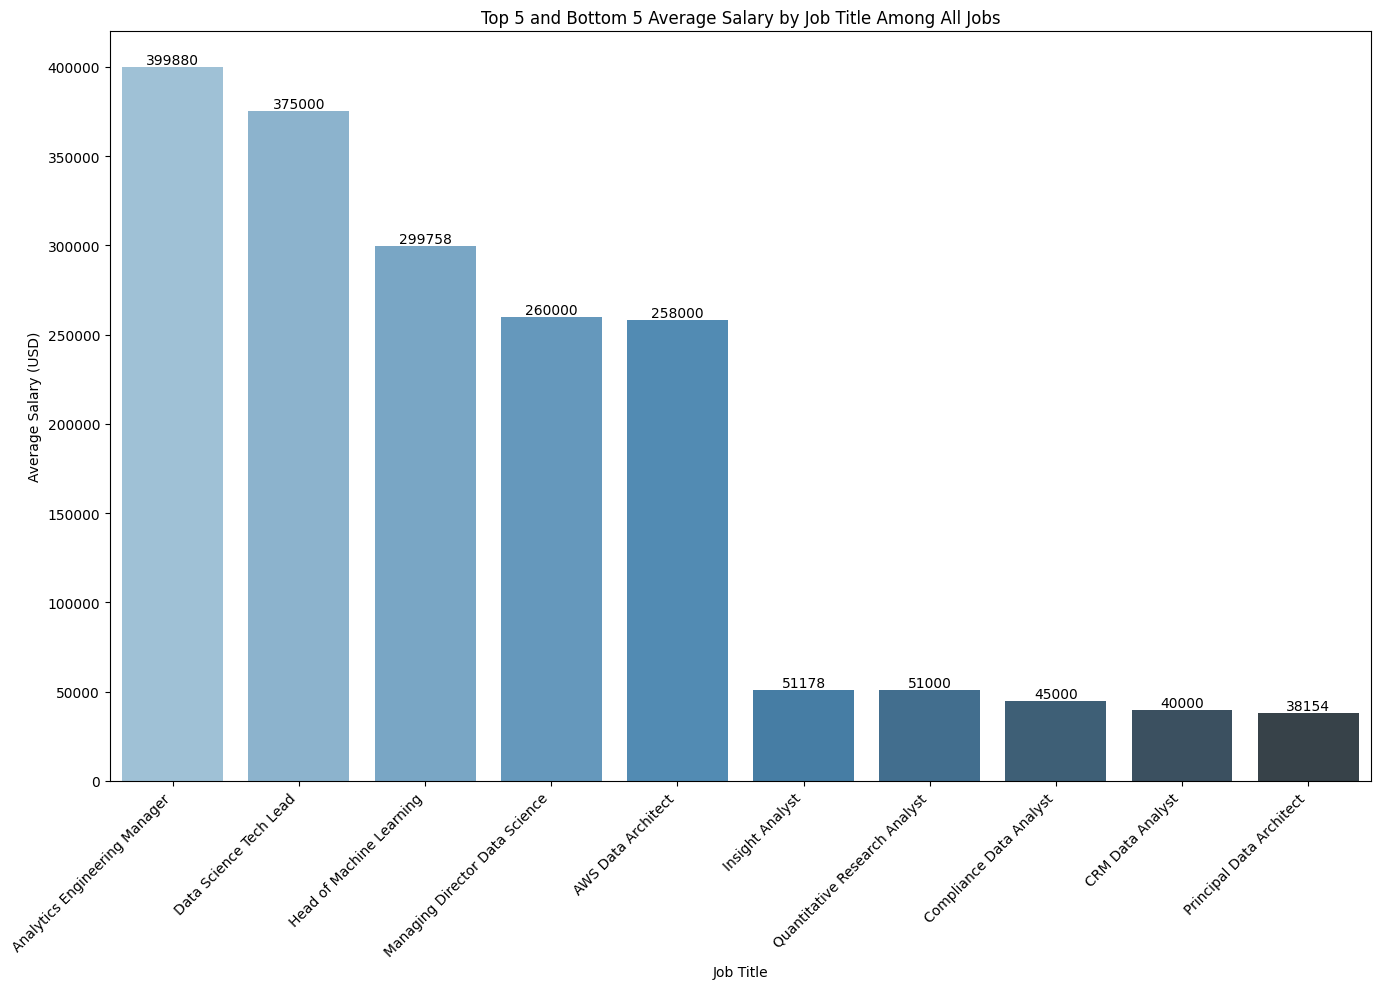

In [29]:
# Calculate the average salary for each job title
avg_salary_by_title = data.groupby(['job_title'])['salary_in_usd'].mean()

# Sort the average salaries in descending order
sorted_avg_salary = avg_salary_by_title.sort_values(ascending=False)

# Get the top and bottom 5 average salaries
top_5_avg_salary = sorted_avg_salary.head(5)
bottom_5_avg_salary = sorted_avg_salary.tail(5)

# Concatenate top and bottom 5 average salaries
combined_avg_salary = pd.concat([top_5_avg_salary, bottom_5_avg_salary]).reset_index()

# Plot the combined average salaries using seaborn
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='job_title', y='salary_in_usd', data=combined_avg_salary, palette='Blues_d')
plt.title('Top 5 and Bottom 5 Average Salary by Job Title Among All Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels inside the bars
for index, value in enumerate(combined_avg_salary['salary_in_usd']):
    ax.text(index, value, int(value), color='black', ha="center", va="bottom")

plt.show()


**15. What are the top 10 most prevalent job titles among employees?**

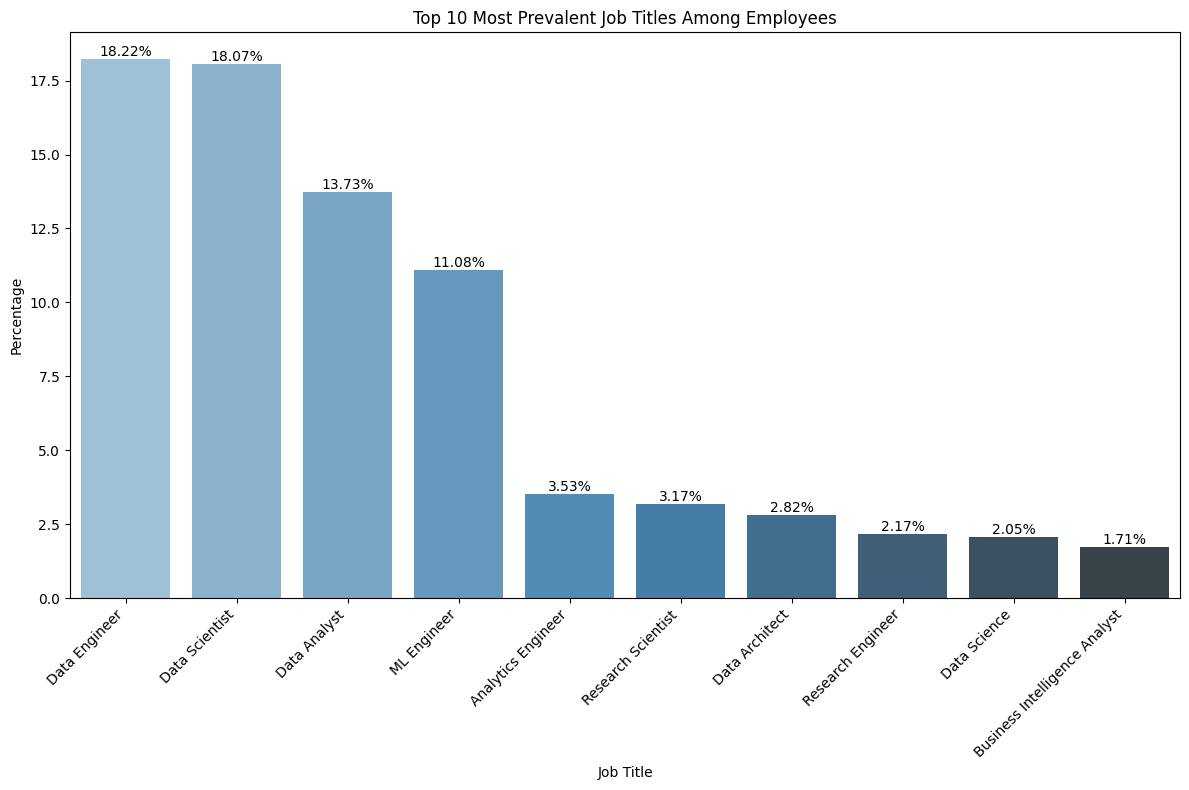

In [30]:
# Count the occurrences of each job title
job_title_counts = data['job_title'].value_counts()

# Calculate the total number of job titles
total_job_titles = len(data)

# Calculate the percentage of each job title among all job titles
job_title_percentages = (job_title_counts / total_job_titles) * 100

# Select the top 10 most prevalent job titles
top_10_job_titles = job_title_percentages.nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=top_10_job_titles.index, y=top_10_job_titles.values, palette='Blues_d')
plt.title('Top 10 Most Prevalent Job Titles Among Employees')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels inside the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.grid(False)
plt.show()


**16. How does the average salary change over the years for the top 5 most prevalent job titles?**

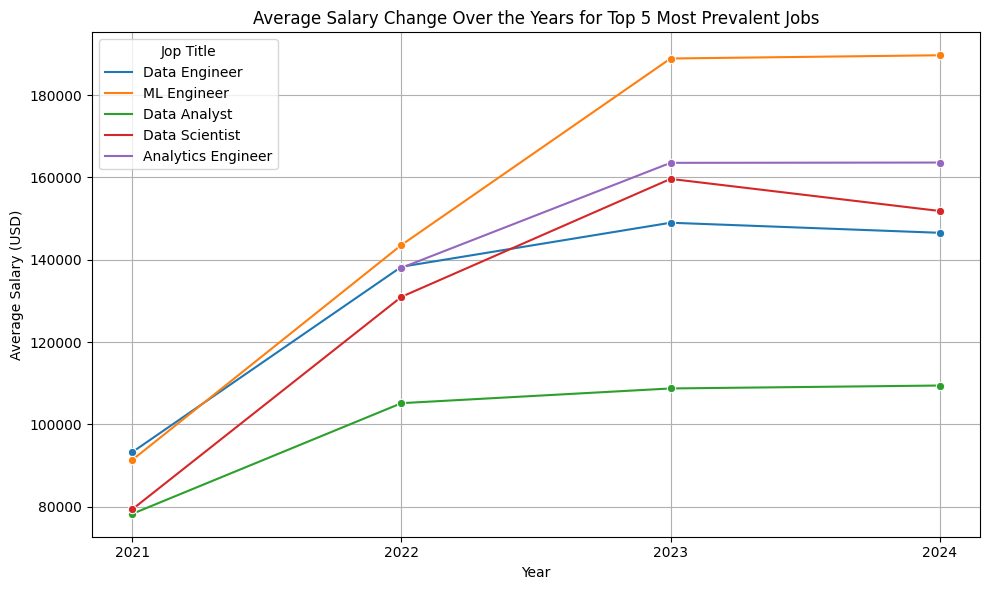

In [31]:
# Ignoring warnings
warnings.filterwarnings("ignore")

# Define the top 5 job titles
top_5_job_titles = data['job_title'].value_counts().head(5).index

# Filter the data for the top 5 job titles
filtered_data_top_5_jobs = data[data['job_title'].isin(top_5_job_titles)]

# Get unique years from the data
unique_years = sorted(data['work_year'].unique())

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data_top_5_jobs, x='work_year', y='salary_in_usd', hue='job_title',marker='o', markers=True, errorbar=None)
plt.title('Average Salary Change Over the Years for Top 5 Most Prevalent Jobs')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(unique_years)
plt.grid(True)
plt.legend(title='Jop Title')
plt.tight_layout()
plt.show()


**17. How does the average salary change over the years for the top 5 most prevalent jobs?**

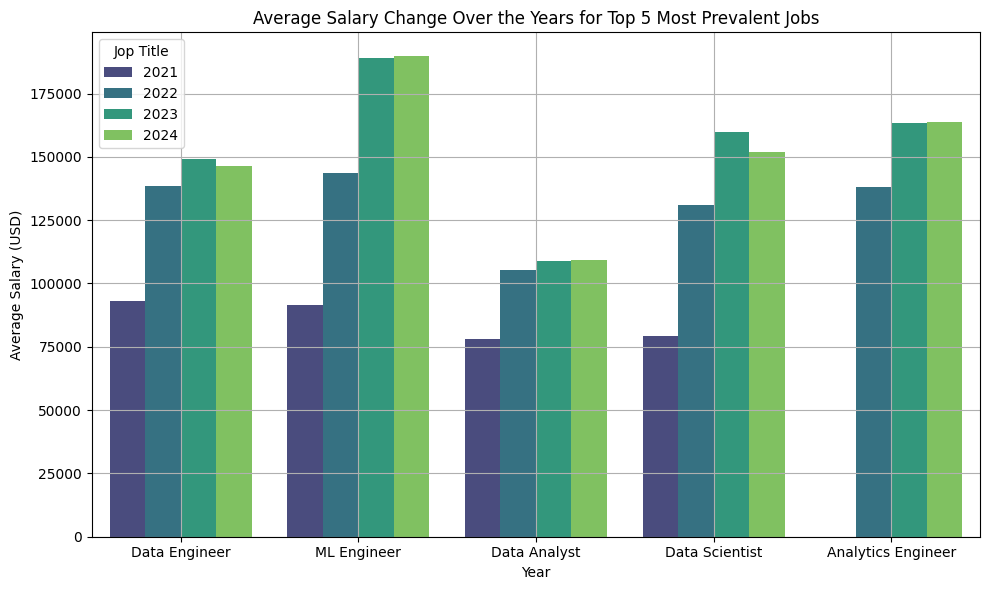

In [32]:
# Define the top 5 job titles
top_5_job_titles = data['job_title'].value_counts().head(5).index

# Filter the data for the top 5 job titles
filtered_data_top_5_jobs = data[data['job_title'].isin(top_5_job_titles)]

# Get unique years from the data
unique_years = sorted(data['work_year'].unique())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data_top_5_jobs, x='job_title', y='salary_in_usd', hue='work_year', errorbar=None, palette='viridis')
plt.title('Average Salary Change Over the Years for Top 5 Most Prevalent Jobs')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.legend(title='Jop Title', loc='upper left')
plt.tight_layout()
plt.show()

**18. What are the top 5 most prevalent job titles each year, presented as a percentage of total jobs for that year?**

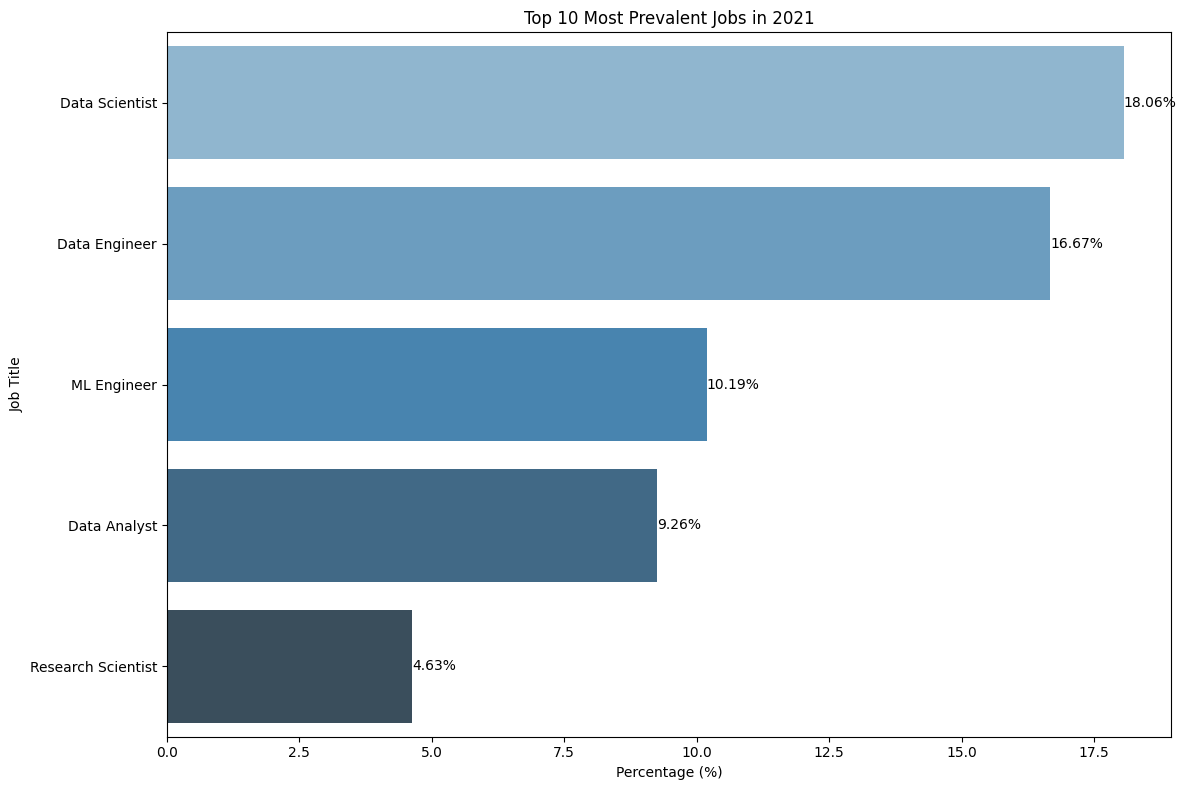

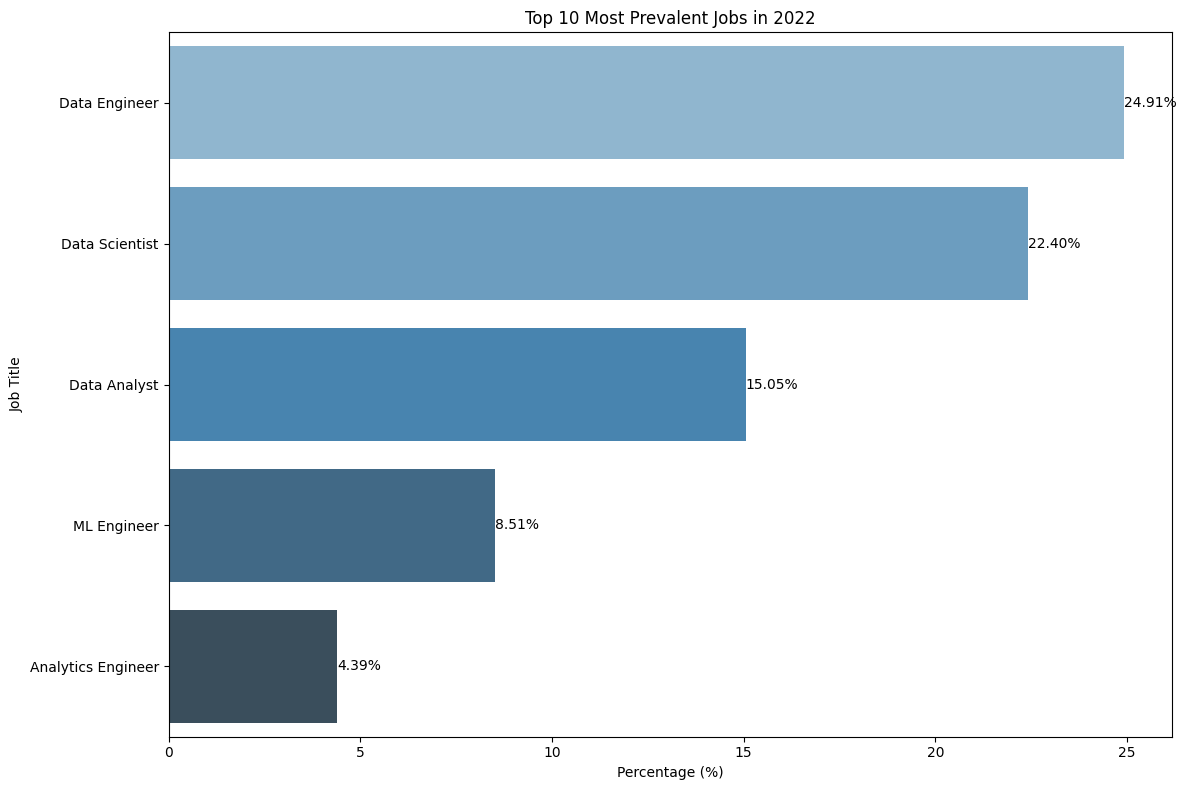

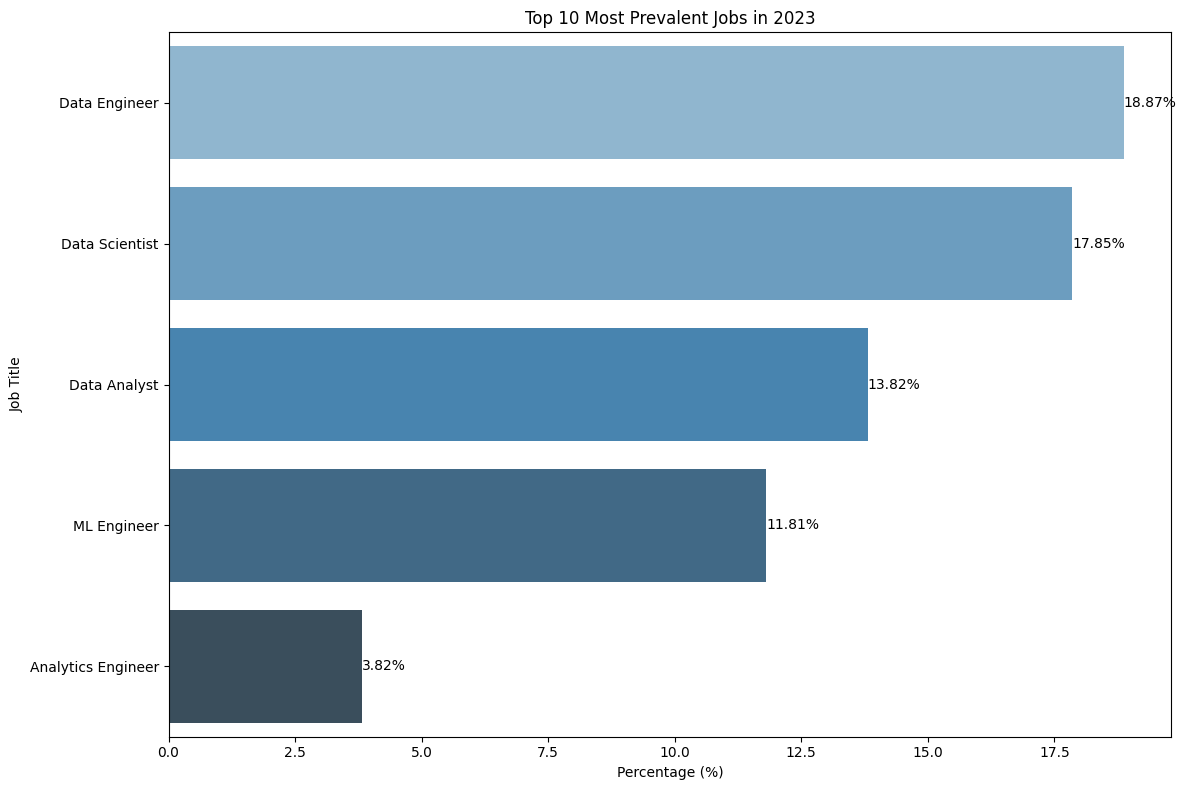

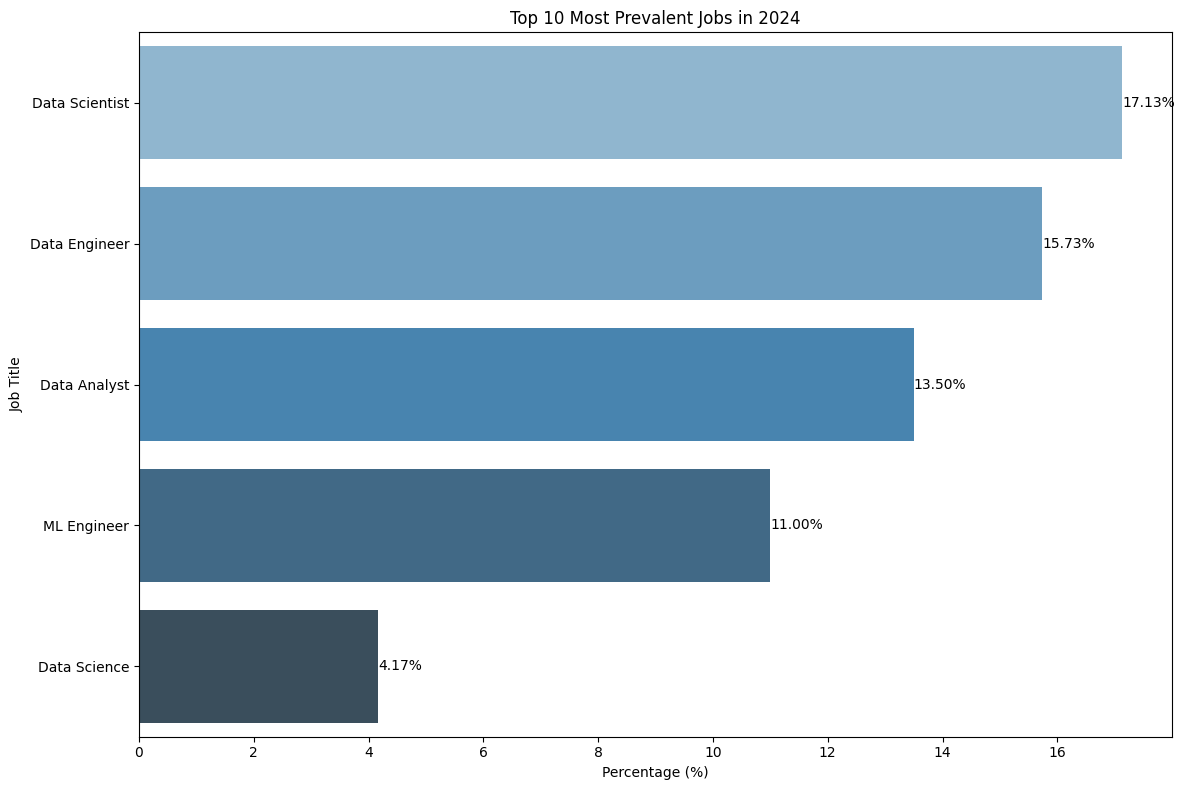

In [33]:
# Grouping the data by year and job title
job_title_counts_by_year = data.groupby(['work_year', 'job_title']).size().unstack(fill_value=0)

# Getting unique years from the "work_year" column
unique_years = sorted(data['work_year'].unique())

# Determine the layout of subplots based on the number of unique years
num_years = len(unique_years)

# Iterate over each year and plot the top 10 most prevalent job titles by percentage
for year in unique_years:
    plt.figure(figsize=(12, 8))
    
    job_titles_year = job_title_counts_by_year.loc[year]
    total_jobs_year = job_titles_year.sum()
    job_titles_percentage = (job_titles_year / total_jobs_year) * 100
    top_10_job_titles = job_titles_percentage.nlargest(5)
    
    bars = sns.barplot(x=top_10_job_titles.values, y=top_10_job_titles.index, palette='Blues_d')
    plt.title(f'Top 10 Most Prevalent Jobs in {year}')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Job Title')
    
    # Add labels to the bars
    for bar in bars.patches:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center', ha='left')

    plt.tight_layout()
    plt.grid(False)
    plt.show()


**19. What are the top 5 most prevalent job titles within small (S), medium (M), and large (L) companies, presented as a percentage of total job titles in each company size category?**

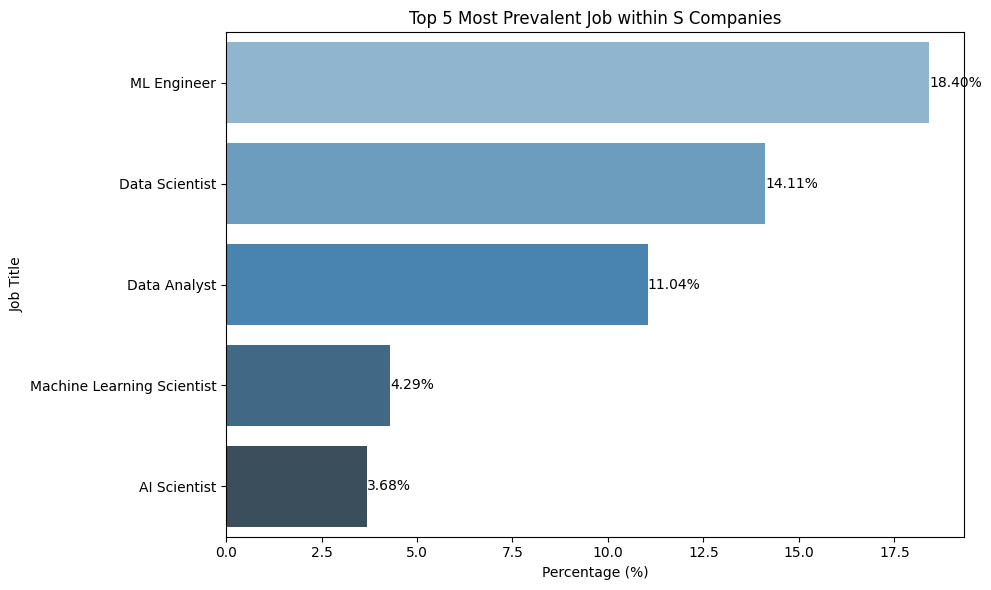

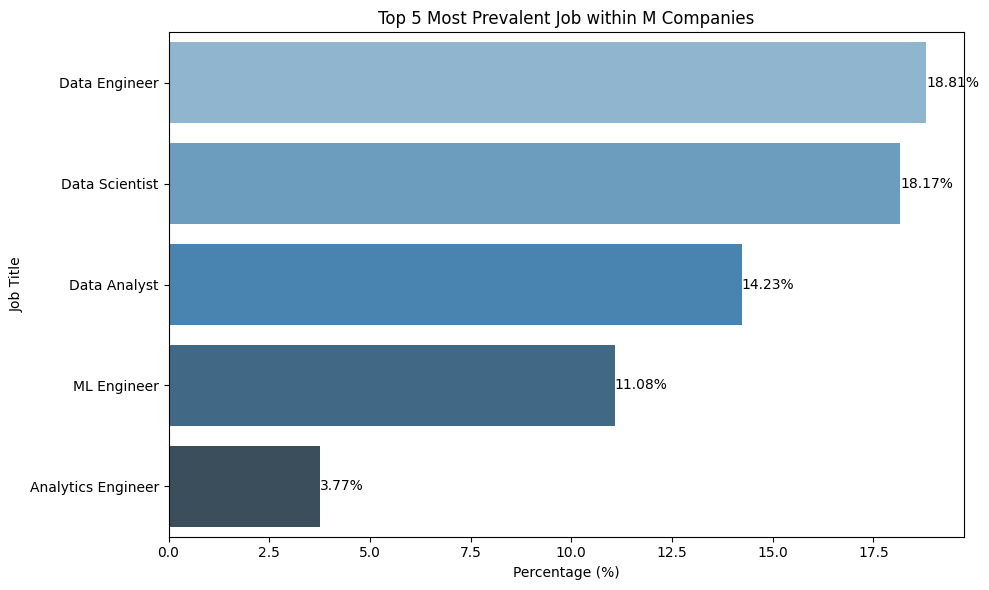

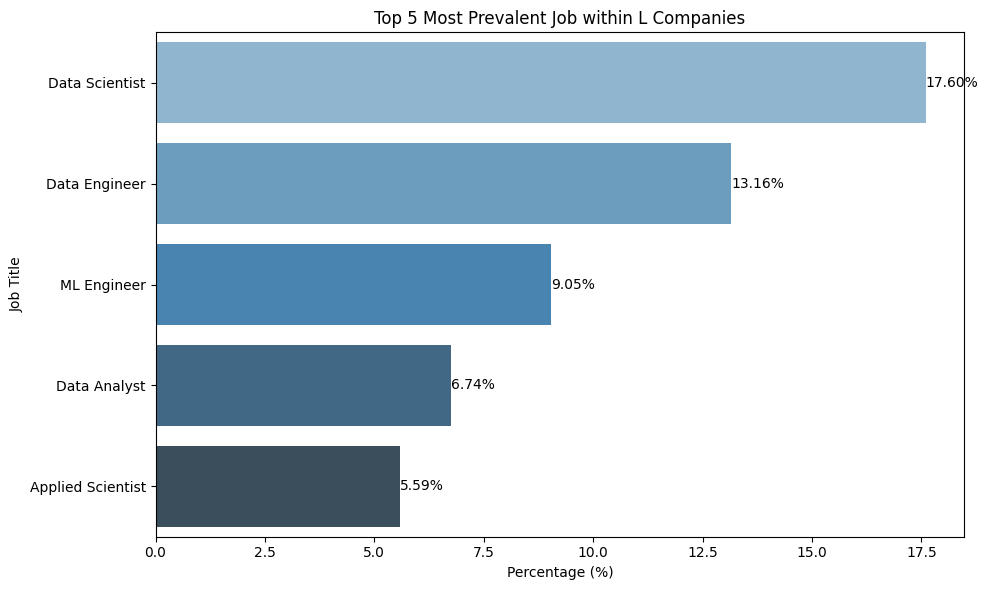

In [34]:
# Group the data by company size and job title, then count the occurrences
job_title_counts = data.groupby(['company_size', 'job_title']).size().reset_index(name='count')

# Calculate the total count of job titles in each company size category
total_jobs = {}
for size in ['S', 'M', 'L']:
    total_jobs[size] = job_title_counts[job_title_counts['company_size'] == size]['count'].sum()

# Plotting for each company size
for size in ['S', 'M', 'L']:
    company_data = job_title_counts[job_title_counts['company_size'] == size].copy()
    company_data['percentage'] = (company_data['count'] / total_jobs[size]) * 100
    top_10_jobs = company_data.nlargest(5, 'percentage')

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(x='percentage', y='job_title', data=top_10_jobs, palette='Blues_d')
    plt.title(f'Top 5 Most Prevalent Job within {size} Companies')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Job Title')

    # Add labels on bars
    for bar in bars.patches:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center', ha='left')

    plt.tight_layout()
    plt.grid(False)
    plt.show()


**20. What are the top 5 jobs with the highest salary increase over the years and the top 5 jobs with the lowest salary decrease over the years?**

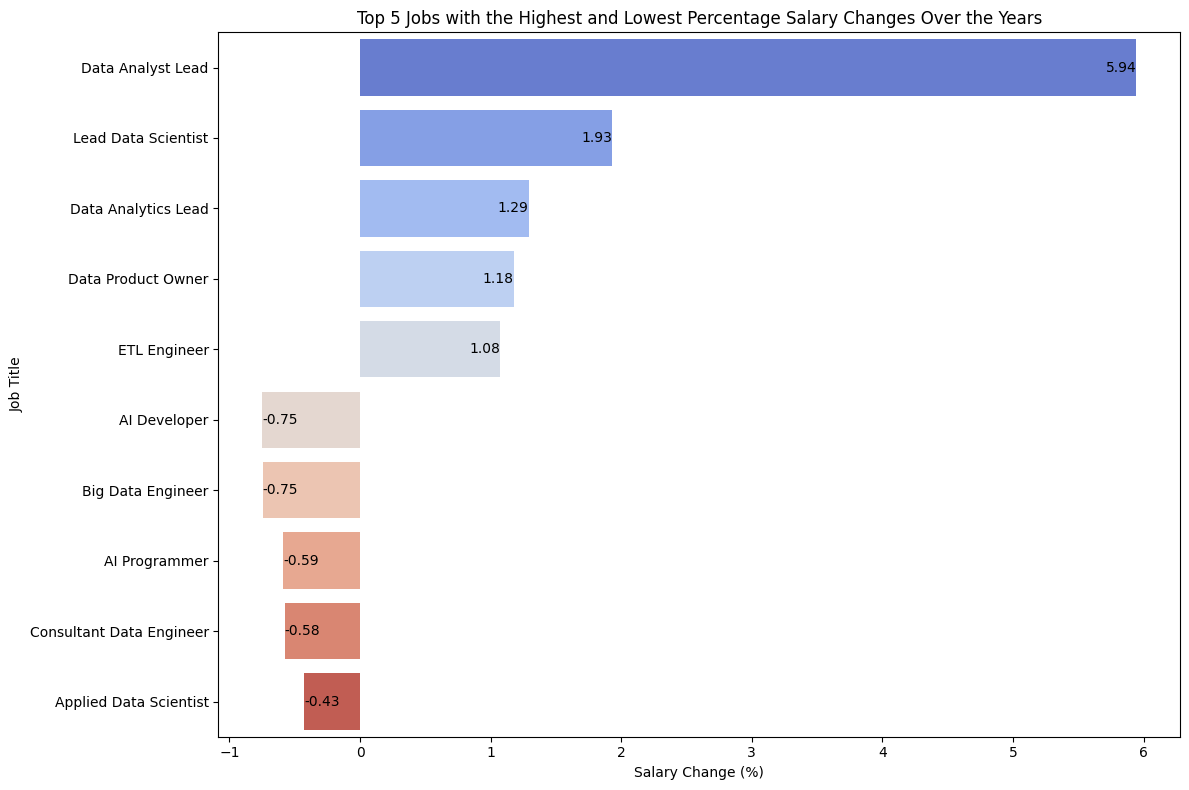

In [35]:
# Grouping the data by years and calculating the average salary for each job title
salary_changes = data.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().unstack(level=0)

# Calculating the percentage change in salaries between years
salary_changes['salary_change'] = salary_changes.pct_change(axis=1, fill_method=None).iloc[:, -1]

# Get the top 5 jobs with the highest salary increase over the years
top_5_salary_increase = salary_changes['salary_change'].nlargest(5).reset_index()

# Get the top 5 jobs with the lowest salary decrease over the years
top_5_salary_decrease = salary_changes['salary_change'].nsmallest(5).reset_index()

# Concatenate the top 5 increases and decreases
top_salary_changes = pd.concat([top_5_salary_increase, top_5_salary_decrease])

# Plotting the top 5 jobs with the highest and lowest salary changes over the years
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='salary_change', y='job_title', data=top_salary_changes, palette='coolwarm', dodge=False)
plt.title('Top 5 Jobs with the Highest and Lowest Percentage Salary Changes Over the Years')
plt.xlabel('Salary Change (%)')
plt.ylabel('Job Title')

# Annotate each bar with its respective value
for index, value in enumerate(top_salary_changes['salary_change']):
    ax.text(value, index, f'{value:.2f}', va='center', ha='right' if value > 0 else 'left')

plt.tight_layout()
plt.show()


**21. What are the top 5 job titles or fields with the highest increase and decrease in employment count over the years?**

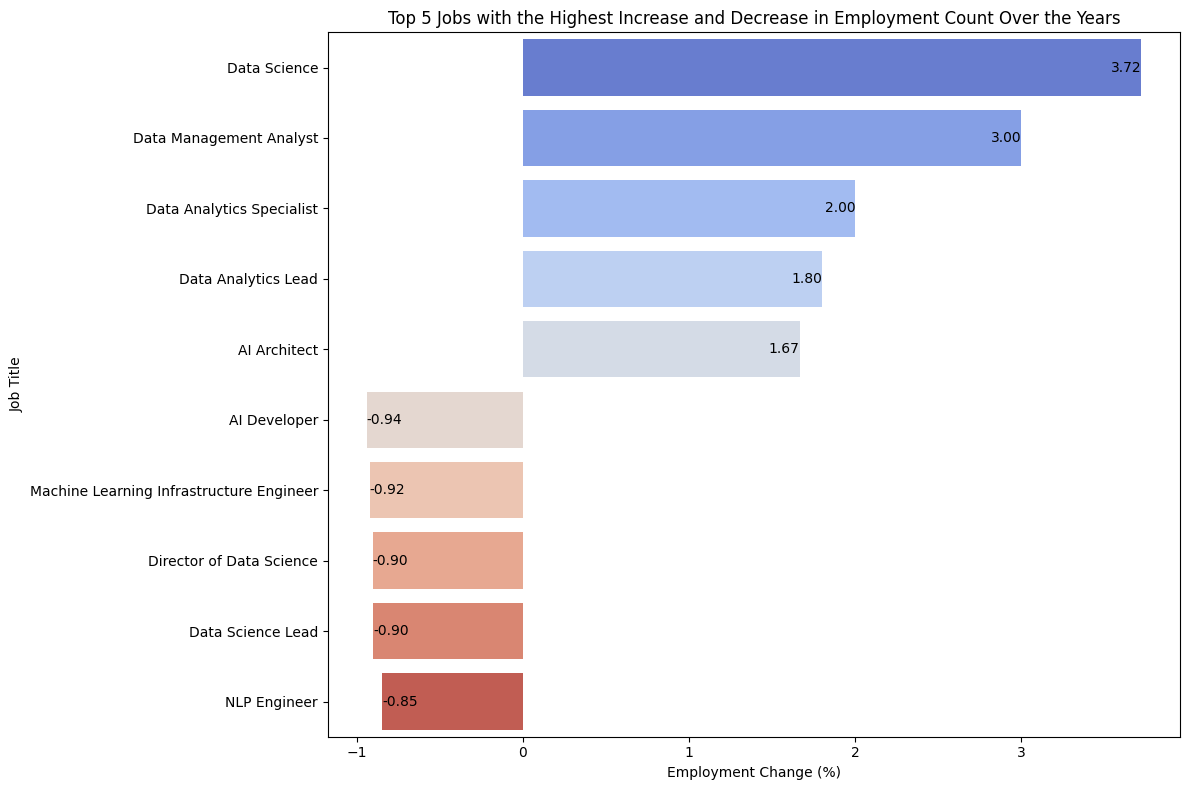

In [36]:
# Grouping the data by years and determining the change in employment count for each job title or field
employment_changes = data.groupby(['work_year', 'job_title']).size().unstack(level=0)

# Calculating the percentage change in employment count between years
employment_changes['employment_change'] = employment_changes.pct_change(axis=1, fill_method=None).iloc[:, -1]
# Getting the top 5 fields with the highest increase in employment count over the years
top_5_employment_increase = employment_changes['employment_change'].nlargest(5).reset_index()

# Getting the top 5 fields with the highest decrease in employment count over the years
top_5_employment_decrease = employment_changes['employment_change'].nsmallest(5).reset_index()
# Concatenate the top 5 increases and decreases
top_employment_changes = pd.concat([top_5_employment_increase, top_5_employment_decrease])

# Plotting the top 5 fields with the highest increase and decrease in employment count over the years
plt.figure(figsize=(12, 8))

# Plotting both increases and decreases
ax = sns.barplot(x='employment_change', y='job_title', data=top_employment_changes, palette='coolwarm', dodge=False)
plt.title('Top 5 Jobs with the Highest Increase and Decrease in Employment Count Over the Years')
plt.xlabel('Employment Change (%)')
plt.ylabel('Job Title')

# Annotate each bar with its respective value
for index, value in enumerate(top_employment_changes['employment_change']):
    ax.text(value, index, f'{value:.2f}', va='center', ha='right' if value > 0 else 'left')

plt.tight_layout()
plt.show()
